# Test system for function development

In [1]:
# DO NOT MODIFY BELOW

# File Handling
import os
import pickle

# Array Handling
import numpy as np
import pandas as pd

# Make Plotting Interactive
from ipywidgets import interact, fixed, widgets

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp

# Plot Handling
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
# Where is the data?

# Directory Containing Experiment:
pickle_dir = r'D:\UU QEXAFS Workup\Nina - BF31\Fe Edge\Up\Results\Step B'

# Name of Experiment (must include extension '.pickle')
pickle_name = 'BF31-Fe-B.pickle'


In [3]:
# DO NOT MODIFY BELOW

pickle_path = os.path.join(pickle_dir,pickle_name)
pickle_in = open(pickle_path,"rb")
my_exp = pickle.load(pickle_in)
pickle_in.close()

## Test Functions

In [39]:
def plot_Transient_Map(exp, spectra_list, Spec_vline, Index_vline, emin, emax):
    
    # Color Map for Spectra Plot:
    cmap = pfcts.get_cmap(len(exp.spectra), name = 'Set1')    
    
    # Set up figure with subplots   
    fig1 = plt.figure(constrained_layout=True, figsize = (12, 10))
    spec1 = gridspec.GridSpec(ncols = 2, nrows = 1, figure = fig1)
    ax1 = fig1.add_subplot(spec1[0,0])
    ax2 = fig1.add_subplot(spec1[0,1])
    
    # Plotting the spectra files in ax1:
    for i in range(len(spectra_list)):
        
        spectra_name = list(exp.spectra.keys())[spectra_list[i]]
        
        x = exp.spectra[spectra_name]['Absorption Spectra']['mu Sample'].energy
        y = exp.spectra[spectra_name]['Absorption Spectra']['mu Sample'].flat
        
        ax1.plot(x, y, color = cmap(i), linestyle = 'solid')
        
    ax1.axvline(Spec_vline, color = 'k')
    
    # Plotting the flat mu for all spectra at E from plot 1.
    
    # Convert spectra list postiion to integer list 'x'
    spectra_list_number = list(range(len(list(exp.spectra.keys()))))

    # get flat Norm(mux) value closest to largest energy variation 'y'
    spectra_mu = []

    for key in exp.spectra.keys():  
        # find closest energy point
        idx = fcts.find_nearest(exp.spectra[key]['Absorption Spectra']['mu Sample'].energy, Spec_vline)

        #get flattened mu value and append to spectra_mu list
        spectra_mu.append(exp.spectra[key]['Absorption Spectra']['mu Sample'].flat[idx[0]])

    ax2.plot(spectra_list_number, spectra_mu, color = 'r')
    
    for line in Index_vline:
        ax2.axvline(line, color = 'k')
    
    # Set Plot Formatting
    ax1.set_xlim([emin, emax])
    ax1.set_xlabel('Photon Energy [eV]')
    ax1.set_ylabel('Norm mu')
    
    ax2.set_xlabel('Spectra Index in Experiment')
    ax2.set_ylabel('Norm mu')
    
    return

# Method for Averaging (merging) Spectra

In [40]:
emin = 7100
emax = 7150
Spec_line = widgets.FloatSlider(value = (emax+emin)/2, min = emin, max = emax, step = 0.1, description = 'Energy')

num_spectra = len(my_exp.spectra) # Might need  keys and list first

spectra_list = [0, num_spectra]

Index_vline = widgets.IntRangeSlider( value = [0, num_spectra], min = 0, max = num_spectra, step = 1, description = 'Index Numbers:') 

interactive(children=(FloatSlider(value=7125.0, description='Energy', max=7150.0, min=7100.0), IntRangeSlider(…

<function __main__.plot_Transient_Map(exp, spectra_list, Spec_vline, Index_vline, emin, emax)>

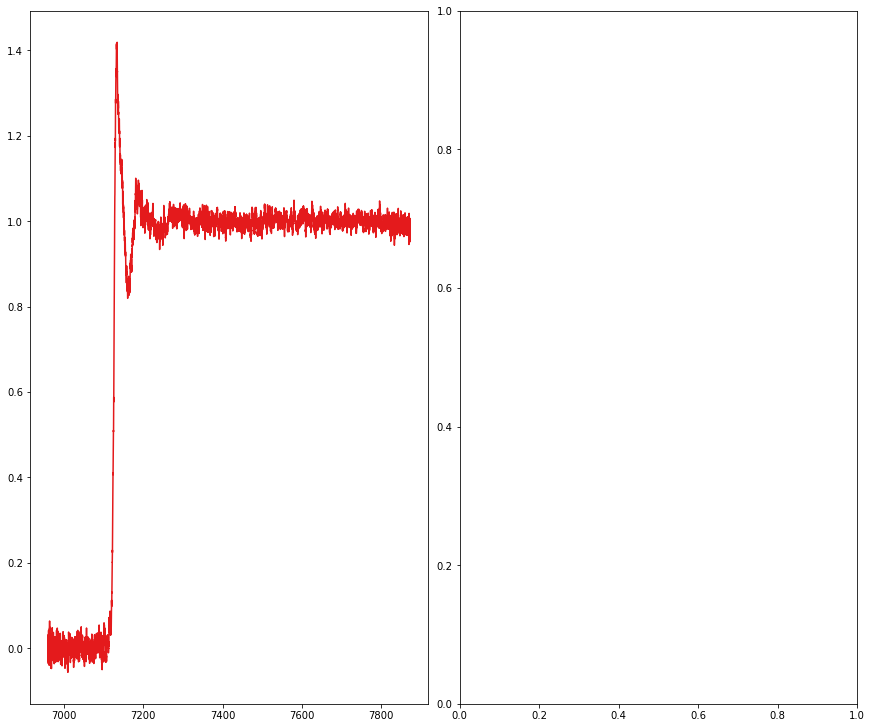

In [41]:
interact(plot_Transient_Map, 
         exp = fixed(my_exp),
         spectra_list = fixed(spectra_list),
         Spec_vline = Spec_line,
         Index_vline = Index_vline,
         emin = fixed(emin), 
         emax = fixed(emax))

In [37]:
Index_vline.value

(910, 2069)

In [ ]:
# List all Spectra in experiment

spectra_list = list(my_exp.spectra.keys())

spectra_list

In [ ]:
# Plot first and last spectra

x1 = my_exp.spectra[spectra_list[0]]['Absorption Spectra']['mu Sample'].energy
y1 = my_exp.spectra[spectra_list[0]]['Absorption Spectra']['mu Sample'].flat

x2 = my_exp.spectra[spectra_list[-1]]['Absorption Spectra']['mu Sample'].energy
y2 = my_exp.spectra[spectra_list[-1]]['Absorption Spectra']['mu Sample'].flat

xy_list = [[x1, y1], [x2, y2]]

In [ ]:
# Make Plotting Interactive
from ipywidgets import widgets

In [ ]:
# Find largest difference in spectra
emin = 7100
emax = 7150


vline_pos = widgets.FloatSlider( value = (emin+emax)/2, min = emin, max = emax, step = 0.1, description = 'Energy:') 
axis_label = ['Photon Energy (eV)','Norm mux'] 
size = [12, 10]

interact(pfcts.plot_XYs_Vline, 
         xy_list = fixed(xy_list), 
         vline_pos = vline_pos, 
         emin = fixed(emin), 
         emax = fixed(emax), 
         axis_label = fixed(axis_label), 
         size = fixed(size))


In [ ]:
# value from plot above
energy_pt = 7132.30

In [ ]:
# Convert spectra list postiion to integer in list
spectra_list_number = list(range(len(spectra_list)))

# get flat Norm(mux) value closest to largest energy variation

spectra_mu = []

for key in my_exp.spectra.keys():
    
    # find closest energy point
    idx = fcts.find_nearest(my_exp.spectra[key]['Absorption Spectra']['mu Sample'].energy, energy_pt)
    
    #get flattened mu value and append to spectra_mu list
    spectra_mu.append(my_exp.spectra[key]['Absorption Spectra']['mu Sample'].flat[idx[0]])
    
xy_list = [[spectra_list_number, spectra_mu]]

In [ ]:
# track mu with spectra number
spectra_min = 0
spectra_max = len(spectra_list)


vline_pos = widgets.FloatSlider( value = (spectra_min+spectra_max)/2, min = spectra_min, max = spectra_max, step = 0.1, description = 'List Number:') 
axis_label = ['Spectra Number in List','Norm mux'] 
size = [12, 10]

interact(pfcts.plot_XYs_Vline, 
         xy_list = fixed(xy_list), 
         vline_pos = vline_pos, 
         emin = fixed(spectra_min), 
         emax = fixed(spectra_max), 
         axis_label = fixed(axis_label), 
         size = fixed(size))

In [ ]:
# Value from above plot

steaty_state_starts = 2200

# Downselect spectra list for merging

merge_spectra_list = spectra_list[steaty_state_starts:]

In [ ]:
merge_spectra_list

In [ ]:
# Create Merged Spectra
merged_spectra1 = exp.merge_spectra(my_exp, spectra_list[steaty_state_starts:])
merged_spectra2 = exp.merge_spectra(my_exp, spectra_list[:100])

In [ ]:
x1 = merged_spectra1['Absorption Spectra']['mu Sample'].energy[100:]
y1 = merged_spectra1['Absorption Spectra']['mu Sample'].mu[100:]

x2 = merged_spectra2['Absorption Spectra']['mu Sample'].energy[100:]
y2 = merged_spectra2['Absorption Spectra']['mu Sample'].mu[100:]

In [ ]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlim(7100, 7150)
plt.ylim(3.2,3.6)

In [ ]:
merged_spectra2['Process Values']['TR1 T [°C]']

In [ ]:
merged_spectra1['Process Values']['TR1 T [°C]']

In [ ]:
x = merged_spectra1['Absorption Spectra']['mu Sample'].energy[100:]
y = merged_spectra1['Absorption Spectra']['mu Sample'].mu[100:]
yerr = merged_spectra1['Absorption Spectra']['mu Sample'].mu_std[100:]

plt.plot(x,y)
#plt.errorbar(x,y, yerr = yerr, ecolor = 'k')
plt.xlim(7100, 7150)
plt.ylim(3.2,3.5)

In [ ]:
merged_spectra1['Absorption Spectra']['mu Sample']

In [ ]:
# Save Merge Spectra + Process Params

data = {
    'Energy': merged_spectra1['Absorption Spectra']['mu Sample'].energy[100:],
    'Sample mu': merged_spectra1['Absorption Spectra']['mu Sample'].mu[100:],
    'Ref mu': merged_spectra1['Absorption Spectra']['mu Reference'].mu[100:],
}

df = pd.DataFrame(data)

In [ ]:
start = df['Energy'].iloc[0]
stop = df['Energy'].iloc[-1]
step = 0.25

new_E = np.arange(start, stop+step, step)

In [ ]:
df.set_index('Energy', inplace = True)

In [ ]:
df2 = fcts.interp_df(df,new_E)

In [ ]:
df2

In [ ]:
output_dir = r'D:\UU QEXAFS Workup\Nina - BF31\Fe Edge\Up\Results\Step B'

merge_fname = r'State B post Reduction2'

process_fname = r'State B post Reduction - params'

In [ ]:
# Save Merge Spectra
df2.to_csv(os.path.join(output_dir, merge_fname + '.csv'), sep=',', na_rep='', header=True, index=True)

# Save Process Params
merged_spectra1['Process Values'].to_csv(os.path.join(output_dir, process_fname + '.csv'), sep=',', na_rep='', header=True, index=False)